# Big Basket's Product Analysis

## Importing the dataset

In [1]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("BigBasket Products.csv")

In [3]:
df.sample(5)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
8321,8322,"Dustbin/Basket - Plastic, Green, Gr BB 617 1",Cleaning & Household,Bins & Bathroom Ware,Sunty,359.0,425.0,Dustbins,NaN,Keep your office or home clean and organized b...
4691,4692,Premium Stainless Steel Serrated Vegetable Kni...,"Kitchen, Garden & Pets",Kitchen Accessories,BB Home,99.0,190.0,Knives & Peelers,NaN,BB Home knife feature high-quality carbon stee...
9166,9167,Onion - Thin Sliced,Fruits & Vegetables,Fresh Vegetables,Fresho,22.0,27.5,Cut & Peeled Veggies,NaN,Our perfectly thin sliced onions are a sight t...
24600,24601,Kasamrit Herbal Tonic - For Cough & Cold,Beauty & Hygiene,Health & Medicine,Baidyanath,90.0,90.0,Ayurveda,NaN,Baidyanath Kasamrit Herbal Cough Syrup is a no...
14111,14112,Titanium EDP Fresh Perfume For Men,Beauty & Hygiene,Fragrances & Deos,Ajmal,936.0,1200.0,Eau De Parfum,NaN,The fragrance is designed for men who are adve...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


*We're going to remove the index column because we don't need it. Also, we can get rid of the description column because it won't help with our analysis. However, for now, let's leave it there. We noticed there's a missing value in both the product and brand columns, so we need to fix that. Even though there are missing values in the ratings column, it's still useful, so we'll leave them as they are.*

## Data Cleaning

In [5]:
df.drop(columns='index',axis=1,inplace=True)

In [6]:
df.loc[df['product'].isnull(),'product'] = 'Not Available'

In [7]:
df.loc[df['brand'].isnull(),'brand'] = 'Not Available'

## Exploratory Data Analysis

In [8]:
df['category'].nunique()

11

In [9]:
df['sub_category'].nunique()

90

In [10]:
df['type'].nunique()

426

In [11]:
df['product'].nunique()

23541

In [12]:
df['brand'].nunique()

2314

*There are 11 main types of products. Each of these types can be divided into 90 smaller categories. In total, there are 
426 different varieties of products. When you add them all up, there are 23,541 unique products 
available from 2,341 different brands.*

*You might be wondering why, even though there are 27,555 rows in the dataset, we're saying there are only 23,541 unique products. 
This is because we're counting only the distinct or unique products. However, the same product can be made by different brands. 
For instance, let's consider "turmeric" as an example: Different brands like Everest, Tata Sampann, and Annapoorna might all 
manufacture packets of turmeric.*

**Category Segmentation**

In [13]:
df.groupby(by='category')['sub_category'].nunique().reset_index()

,category,sub_category
0,Baby Care,7
1,"Bakery, Cakes & Dairy",8
2,Beauty & Hygiene,10
3,Beverages,6
4,Cleaning & Household,10
5,"Eggs, Meat & Fish",6
6,"Foodgrains, Oil & Masala",9
7,Fruits & Vegetables,7
8,Gourmet & World Food,14
9,"Kitchen, Garden & Pets",10


*Each of the aforementioned categories is further divided into specific subcategories. However, for our comprehensive 
analysis, we will focus solely on the main categories.*

**Now, let's figure out Big Basket's percentage of product count in each category.**

In [14]:
category_seg = df['category'].value_counts().reset_index()

category_seg['%_of_total'] = round(category_seg['count'] * 100 /category_seg['count'].sum(),2)

category_seg

,category,count,%_of_total
0,Beauty & Hygiene,7867,28.55
1,Gourmet & World Food,4690,17.02
2,"Kitchen, Garden & Pets",3580,12.99
3,Snacks & Branded Foods,2814,10.21
4,"Foodgrains, Oil & Masala",2676,9.71
5,Cleaning & Household,2675,9.71
6,Beverages,885,3.21
7,"Bakery, Cakes & Dairy",851,3.09
8,Baby Care,610,2.21
9,Fruits & Vegetables,557,2.02


In [15]:
import textwrap

def wrap_text(ax, width):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text,width=width,break_long_words=False))
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels,rotation=0)

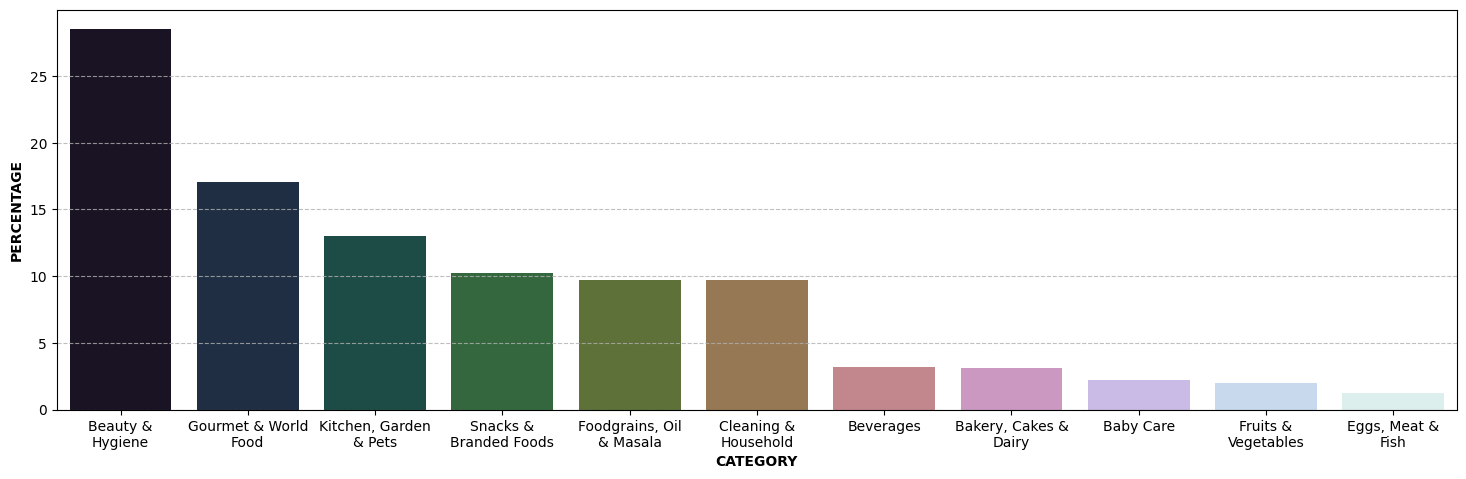

In [16]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])

sns.barplot(data=category_seg, x='category', y='%_of_total', palette='cubehelix',hue='category',legend=False)

ax.set_xlabel('CATEGORY',weight='semibold')
ax.set_ylabel('PERCENTAGE',weight='semibold')

plt.grid(axis='y',ls='--',alpha=0.8)

wrap_text(ax,15)

*Looking at the numbers, more than a quarter (25%) of the total product count belong to the beauty and hygiene category. Meanwhile, gourmet items, as well as kitchen and garden utilities, make up another 30% combined.*

**Now, let's find out the average price of products in each category.**

In [17]:
average_sp = df.groupby(by='category')['sale_price'].mean().reset_index().sort_values('sale_price',ascending=False)

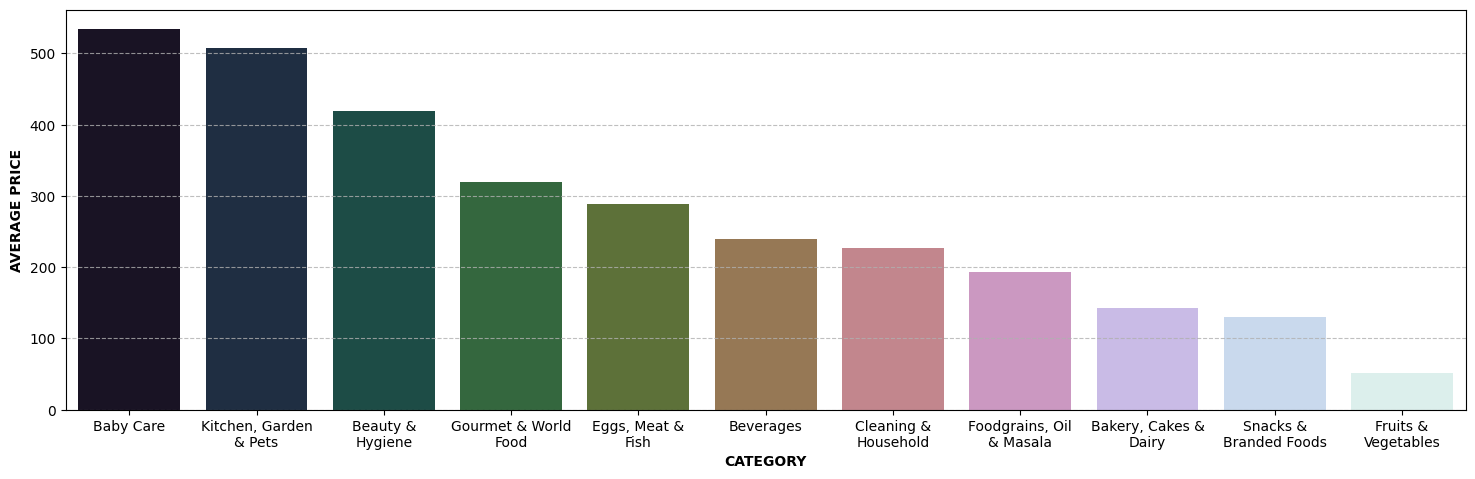

In [18]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])

sns.barplot(data=average_sp,x='category',y='sale_price',palette='cubehelix',hue='category',legend=False)

ax.set_xlabel('CATEGORY',weight='semibold')
ax.set_ylabel('AVERAGE PRICE',weight='semibold')

wrap_text(ax,15)

plt.grid(axis='y',ls='--',alpha=0.8)

plt.show()

*The baby care section has the highest prices, with kitchen and garden utilities following closely behind, averaging over 500 INR.*

**We'll analyze the average prices charged by Big Basket for each category and compare them with the prices found in the open market.**

In [19]:
price_comp = df.groupby(by='category')[['sale_price','market_price']].mean().reset_index()
melted_df = price_comp.melt(id_vars=['category'],var_name='price_type',value_name='price')

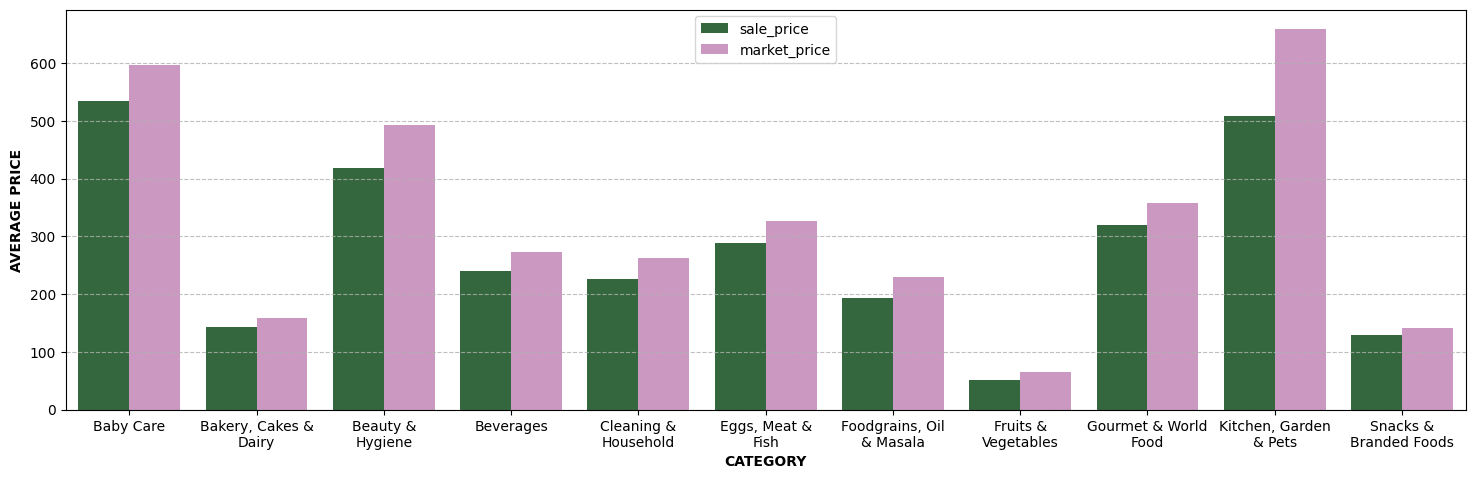

In [20]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])

sns.barplot(data=melted_df,x='category',y='price',palette='cubehelix',hue='price_type')

ax.set_xlabel('CATEGORY',weight='semibold')
ax.set_ylabel('AVERAGE PRICE',weight='semibold')

wrap_text(ax,15)

plt.grid(axis='y',ls='--',alpha=0.8)
plt.legend(loc='upper center')

plt.show()

*Big Basket is giving good discounts across all product categories, with the kitchen and garden items having the biggest discounts.*

**Now let's review the customer feedback section, where we examine the ratings given to various categories.**

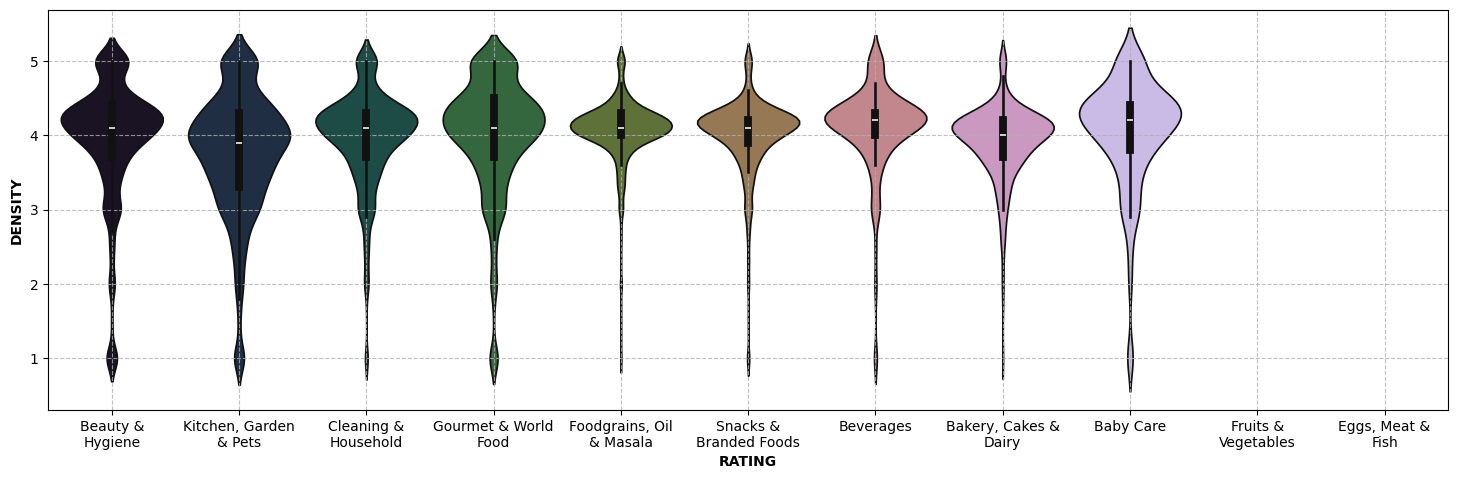

In [21]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])

sns.violinplot(data=df,x='category',y='rating',hue='category',palette='cubehelix')

ax.set_xlabel('RATING',weight='semibold')
ax.set_ylabel('DENSITY',weight='semibold')
wrap_text(ax,15)

plt.grid(axis='both',ls='--',alpha=0.8)

plt.show()

*The majority of products have received ratings around 4. However, there are some products in 
categories like Beauty & Hygiene, Kitchen & Garden utilities, Gourmet Food, and Baby Care with poor ratings. 
On the other hand, Big Basket's flagship concepts like snacks and daily essentials such as oil and spices have 
received mostly ratings above 4.*

**Digging deeper to identify the no. of products in each category that received a rating of lower than 3.**

In [22]:
df[df['rating']<3].groupby(by='category')['product'].count().reset_index().sort_values(by='product',ascending=False)

,category,product
2,Beauty & Hygiene,491
7,"Kitchen, Garden & Pets",328
6,Gourmet & World Food,192
4,Cleaning & Household,139
8,Snacks & Branded Foods,108
5,"Foodgrains, Oil & Masala",43
0,Baby Care,34
1,"Bakery, Cakes & Dairy",31
3,Beverages,25


*Each of these products need to individually investigated at a customer level*

**Now we'll take a look at the product count from brand perspective**

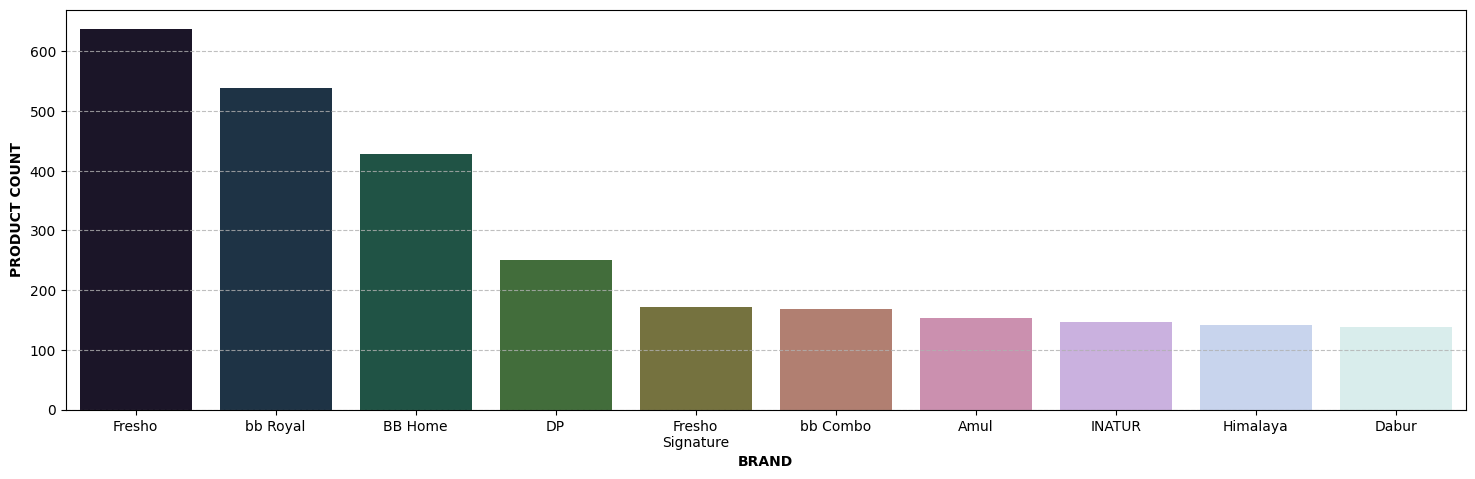

In [23]:
product_count = df['brand'].value_counts().reset_index().nlargest(10,columns='count')

fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])

sns.barplot(data=product_count, x='brand',y='count',palette='cubehelix',hue='brand')
wrap_text(ax,10)
ax.set_xlabel('BRAND',weight='semibold')
ax.set_ylabel('PRODUCT COUNT',weight='semibold')
plt.grid(axis='y',ls='--',alpha=0.8)

plt.show()

**Let's delve into the discount percentages offered by Big Basket at a brand level.**

In [24]:
def discount_percentage(df):
    return round((df['market_price'] - df['sale_price']) * 100 / df['market_price'],2)

df['%_discount'] = df.apply(discount_percentage,axis=1)

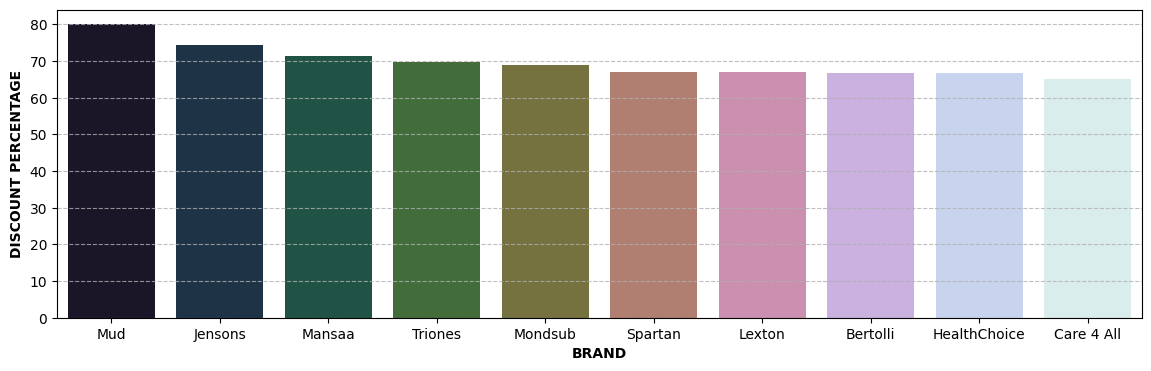

In [25]:
brand_df = df.groupby(by='brand')['%_discount'].mean().round(2).reset_index()

plt.figure(figsize=(14,4))

sns.barplot(data = brand_df.nlargest(10,columns='%_discount'),x='brand',y='%_discount',palette='cubehelix',hue='brand')

plt.xlabel('BRAND',weight='semibold')
plt.ylabel('DISCOUNT PERCENTAGE',weight='semibold')
plt.grid(axis='y',ls='--',alpha=0.8)

plt.show()

*These are the top 10 brands whose products Big Basket is offering at the highest discounted rates. Furthermore, 
the idea that a higher number of products from a particular brand will result in a greater discount percentage 
isn't valid, as there's no relationship between product count and discount percentage from a brand perspective.*

In [26]:
brand_df[brand_df['%_discount']==0]['brand'].nunique()

1141

*Big Basket currently offers discounts on products from 1173 brands, with no discounts provided for products from a total of 1141 brands.*

**Let's explore the total value of unique products sold by each brand on Big Basket.**

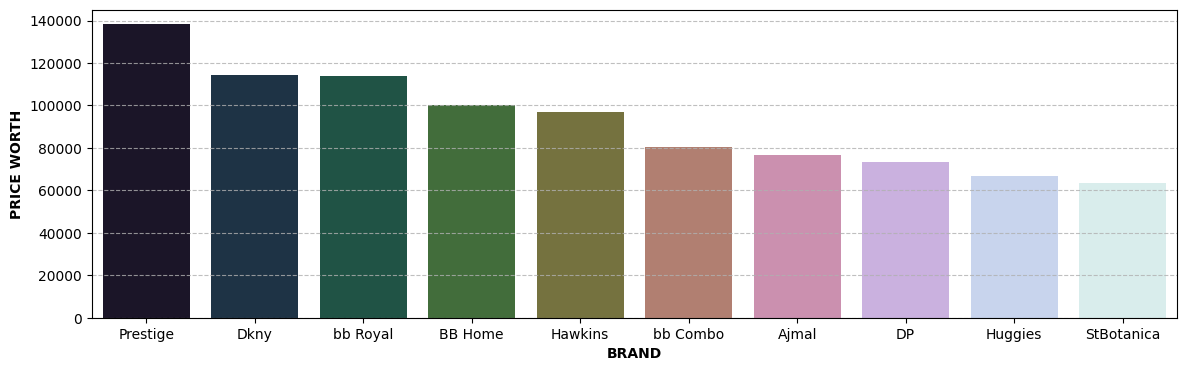

In [27]:
price_sum = df.groupby(by='brand')['sale_price'].sum().reset_index().nlargest(10,columns='sale_price')

plt.figure(figsize=(14,4))

sns.barplot(data=price_sum,x='brand',y='sale_price',palette='cubehelix',hue='brand')

plt.xlabel('BRAND',weight='semibold')
plt.ylabel('PRICE WORTH',weight='semibold')
plt.grid(axis='y',ls='--',alpha=0.8)

plt.show()

*Here are the top 10 brands with the highest total value of unique products being sold on Big Basket. Prestige 
leads the chart with a total value just under 1,40,000.*

In [28]:
category_df = df.groupby(by='category')['%_discount'].mean().round(2).reset_index().sort_values(by='%_discount',ascending=False)

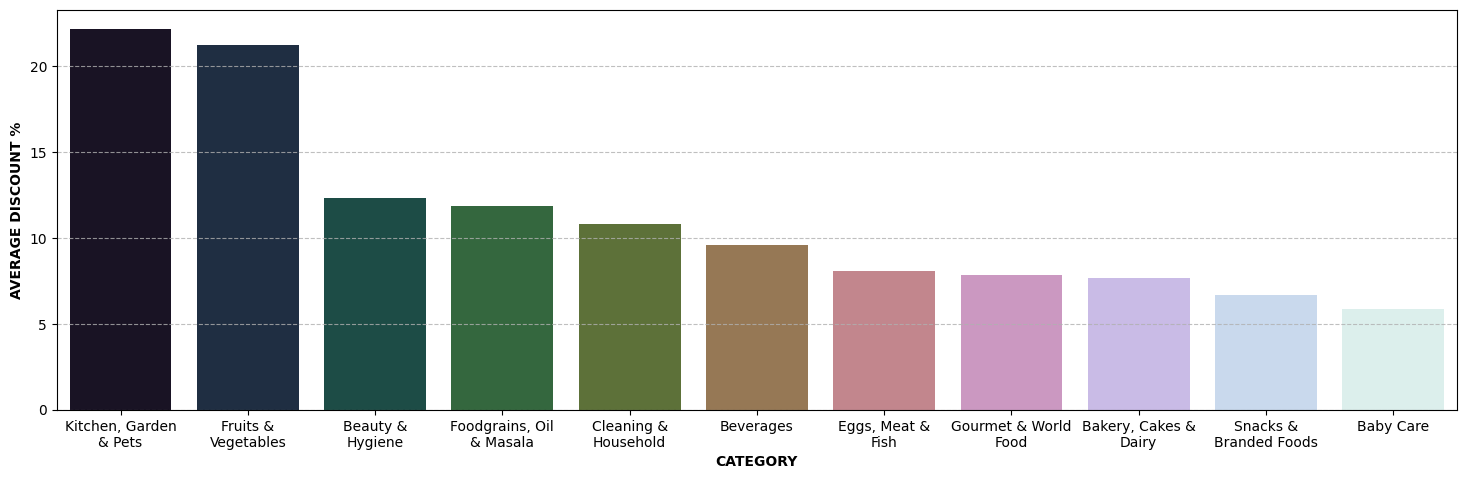

In [29]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])

sns.barplot(data=category_df, x='category',y='%_discount',palette='cubehelix',hue='category')

ax.set_xlabel('CATEGORY',weight='semibold')
ax.set_ylabel('AVERAGE DISCOUNT %',weight='semibold')

wrap_text(ax,15)

plt.grid(axis='y',ls='--',alpha=0.8)

plt.show()

*The most heavily discounted categories are Kitchen and Garden utilities, followed by Fruits and Veggies.*

**Here are the top 10 most affordable types of products offered by Big Basket, along with their comparison to market price.**

In [30]:
low_df = df.groupby(by='type')[['sale_price','market_price']].mean().reset_index().nsmallest(10,columns='sale_price')

low_df[['sale_price','market_price']] = low_df[['sale_price','market_price']].apply(lambda x : round(x,2))

low_df

,type,sale_price,market_price
263,Marigold,15.67,19.58
63,Cabbage & Cauliflower,19.82,35.00
310,Organic Vegetables,25.15,31.64
190,"Gourd, Pumpkin, Drumstick",27.29,39.30
340,"Potato, Onion & Tomato",28.70,37.64
253,"Lemon, Ginger & Garlic",28.94,38.85
356,Root Vegetables,30.94,42.19
252,Leafy Vegetables,31.18,41.60
227,Indian & Exotic Herbs,31.55,41.44
115,Cut & Peeled Veggies,32.39,39.51


*Most of the products belong to the Raw Vegetables category, with only one falling under packaged food, 
which is Marigold. Despite this, Big Basket has managed to keep their selling prices below the current 
market prices, resulting in a significant price difference to attract new customers.*

**Here are the top 10 most expensive types of products offered by Big Basket, along with their comparison to market price.**

In [31]:
high_df = df.groupby(by='type')[['sale_price','market_price']].mean().reset_index().nlargest(10,columns='sale_price')

high_df[['sale_price','market_price']] = high_df[['sale_price','market_price']].apply(lambda x : round(x,2))

high_df

,type,sale_price,market_price
181,Gas Stove,5718.25,8317.50
88,Cloth Dryer & Iron Table,2102.33,3063.25
345,Pressure Cookers,2003.50,2283.32
137,Eau De Parfum,1913.64,2331.60
148,Extra Virgin Olive Oil,1522.45,2131.27
347,"Pure, Pomace Olive Oil",1497.92,1880.89
138,Eau De Toilette,1410.98,1938.78
125,Dinner Sets,1410.92,1777.45
330,Pet Cleaning & Grooming,1259.91,1260.92
139,Electric Toothbrush,1241.85,1353.55


*As we can observe, the majority of the products are utility items, with the exception of Olive Oil, 
which stands out as a typically costly consumable.*

**Following up, we'll examine the top and bottom 5 types of products with the best and worst ratings.**

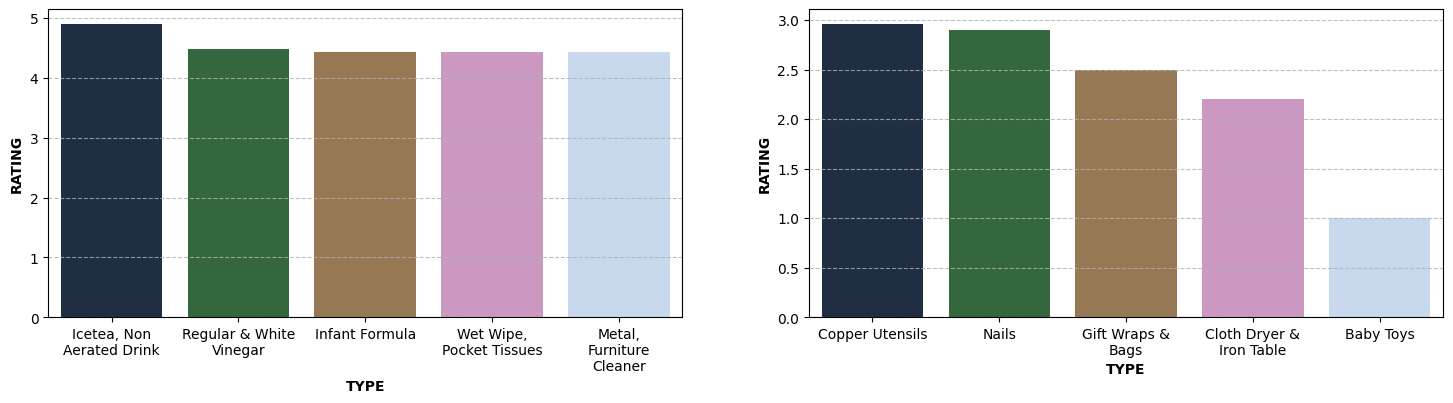

In [32]:
rating_df = df.groupby(by='type')['rating'].mean().reset_index().sort_values(by='rating',ascending=False)

fig = plt.figure(figsize=(18,4))

ax = fig.add_subplot(1,2,1)
sns.barplot(data=rating_df.head(5),x='type',y='rating',palette='cubehelix',hue='type')
wrap_text(ax,15)
ax.set_xlabel('TYPE',weight='semibold')
ax.set_ylabel('RATING',weight='semibold')
plt.grid(axis='y',ls='--',alpha=0.8)

ax = fig.add_subplot(1,2,2)
sns.barplot(data=rating_df[rating_df['rating'].notnull()].tail(5),x='type',y='rating',palette='cubehelix',hue='type')
wrap_text(ax,15)
ax.set_xlabel('TYPE',weight='semibold')
ax.set_ylabel('RATING',weight='semibold')
plt.grid(axis='y',ls='--',alpha=0.8)

plt.show()

In [33]:
def is_discounted(df):
    return ((df['market_price'] - df['sale_price']) != 0)

In [34]:
df['is_discounted'] = df.apply(is_discounted, axis=1)

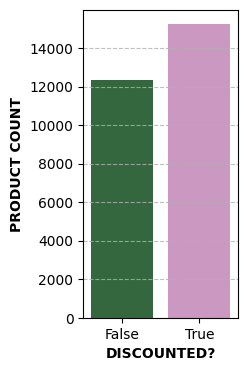

In [35]:
plt.figure(figsize=(2,4))

sns.countplot(data=df, x='is_discounted',palette='cubehelix',hue='is_discounted')
plt.xlabel('DISCOUNTED?',weight='semibold')
plt.ylabel('PRODUCT COUNT',weight='semibold')
plt.grid(axis='y',ls='--',alpha=0.8)
plt.legend().remove()

plt.show()

*Currently, Big Basket provides discounts on over 15,000 different products. However, there are also more than 
12,000 products that are not discounted, which account for 45% of the total product count. This presents a significant 
opportunity for growth in their business if they can tap into this non-discounted segment, potentially attracting more customers.*

**Moving forward, let's examine the total worth of the inventory.**

In [36]:
df['sale_price'].sum()

8886895.53

In [37]:
revenue_df = df.groupby('is_discounted')['sale_price'].sum().reset_index()

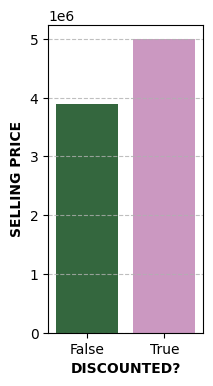

In [38]:
plt.figure(figsize=(2,4))

sns.barplot(data=revenue_df, x='is_discounted',y='sale_price',palette='cubehelix',hue='is_discounted')

plt.xlabel('DISCOUNTED?',weight='semibold')
plt.ylabel('SELLING PRICE',weight='semibold')
plt.grid(axis='y',ls='--',alpha=0.8)
plt.legend().remove()

plt.show()

*The inventory is valued at 8.88 Million in total. Out of this, 4.99 Million worth falls under 
the discounted product segment, while the remaining 3.89 Million remains undiscounted.*

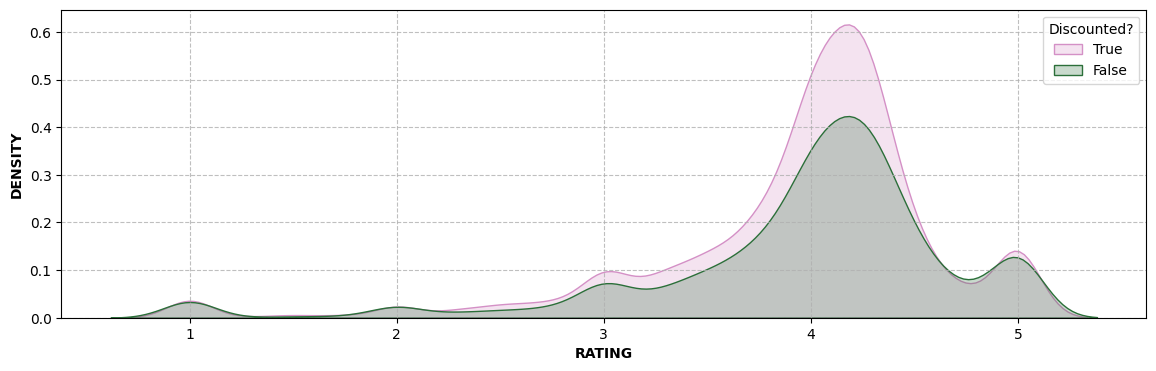

In [39]:
fig = plt.figure(figsize=(14,4))

sns.kdeplot(data=df, x='rating',fill=True,palette='cubehelix',hue='is_discounted')

plt.xlabel('RATING',weight='semibold')
plt.ylabel('DENSITY',weight='semibold')
plt.grid(axis='both',ls='--',alpha=0.8)
plt.legend(labels=['True','False'],title='Discounted?')
plt.show()

*There's often a perception that when a company sells products at discounted rates, it might compromise on quality. 
However, despite the discounted to non-discounted split being 55:45, the feedback and ratings from customers have 
remained consistent. This indicates that Big Basket has been successful in maintaining quality while offering 
products at prices lower than the market rates.*

**Let's investigate further and take a look at category wise rating segmentation with and without discounts**

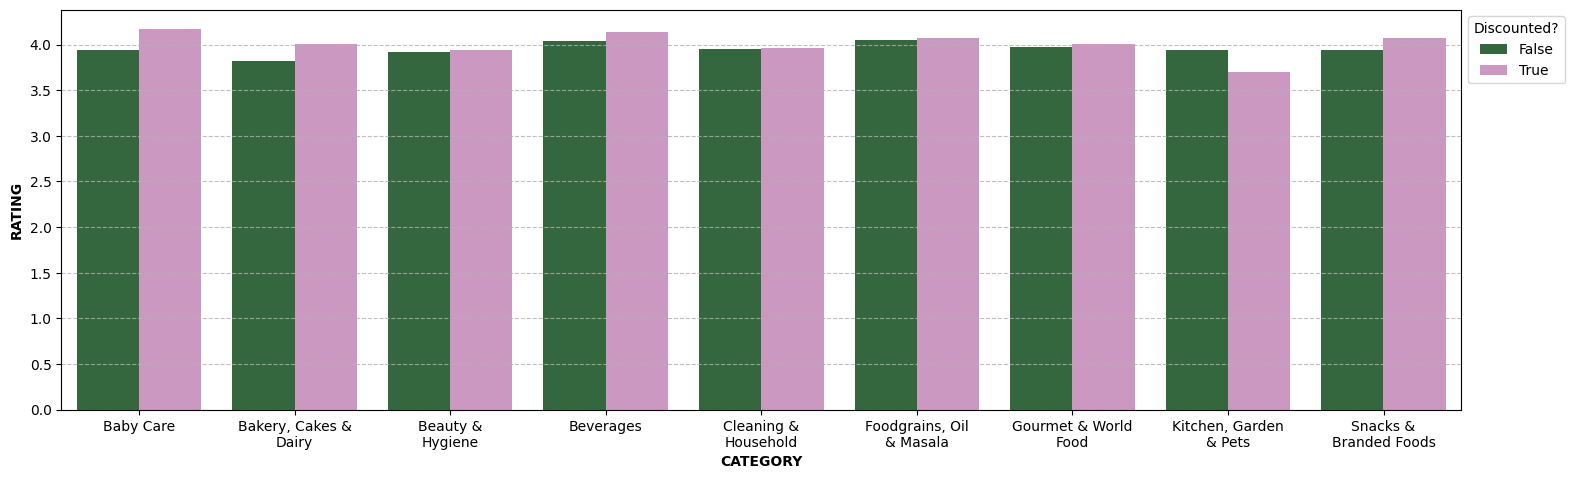

In [40]:
rating_df = df.groupby(by=['category','is_discounted'])['rating'].mean().reset_index()

fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])

sns.barplot(data=rating_df[rating_df['rating'].notnull()], x='category',y='rating',palette='cubehelix',hue='is_discounted')

ax.set_xlabel('CATEGORY',weight='semibold')
ax.set_ylabel('RATING',weight='semibold')
plt.grid(axis='y',ls='--',alpha=0.8)
wrap_text(ax,15)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Discounted?')

plt.show()

*Even when analyzed at a category level, it's evident that discounts have no impact on customer ratings.*

**Lastly, we'll examine the price range and variations within each category.**

*Since individual pricing of products can vary widely, we'll aim to eliminate some of the outliers and focus 
on the range where the majority of the data lies. This will help us gain a solid understanding of the price 
range for each category.*

In [41]:
def remove_outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    filtered_df = df[(df[col]>=lower) & (df[col]<=upper)]
    return filtered_df

In [42]:
filtered_df = remove_outliers(df,'sale_price')

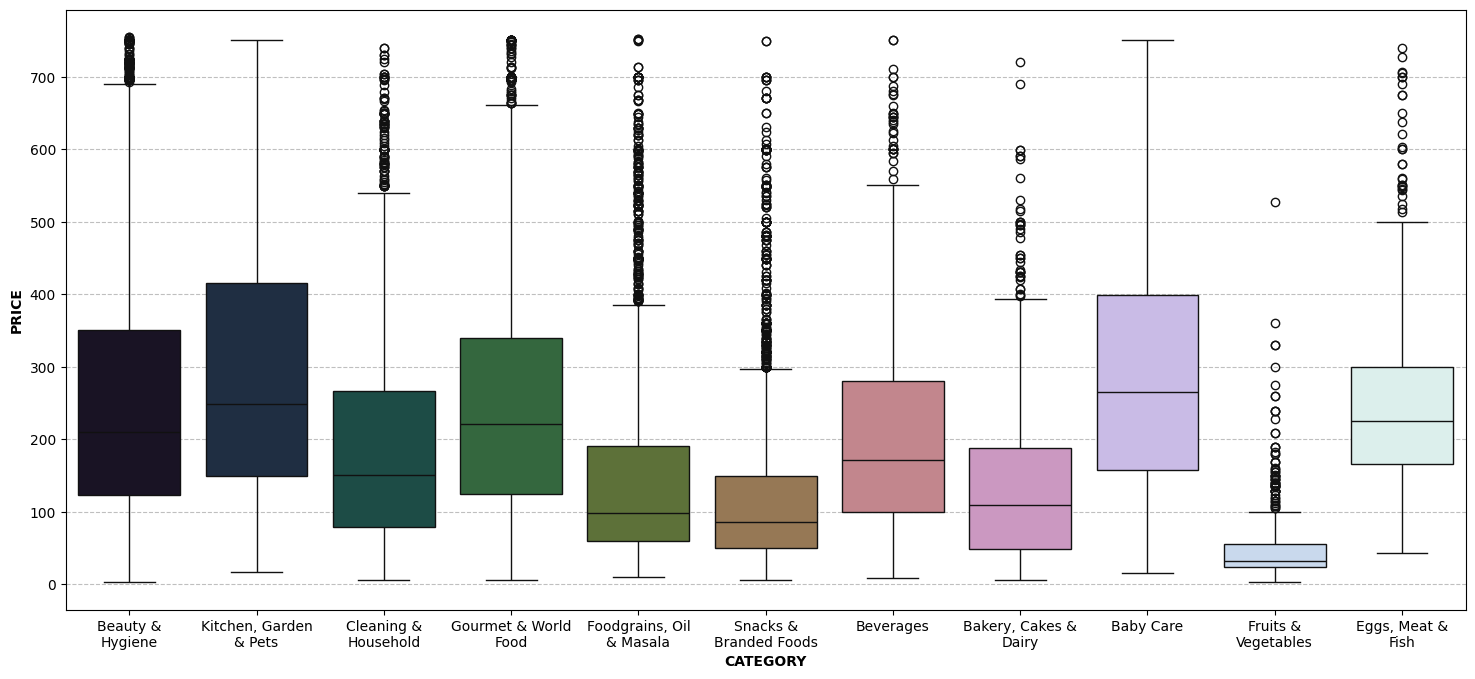

In [43]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([0,0,1,1])

sns.boxplot(data=filtered_df, x='category',y='sale_price',palette='cubehelix',hue='category')

ax.set_xlabel('CATEGORY',weight='semibold')
ax.set_ylabel('PRICE',weight='semibold')
plt.grid(axis='y',ls='--',alpha=0.8)
wrap_text(ax,15)

plt.show()

*Individual product pricing depends a lot on the manufacturing ingredients and brand. So prices can vary a lot, 
unlike fruits and veggies which usually have stable prices. Meat exhibits a wide pricing range due to  the various 
types and cuts offered by Big Basket.*

## The End. Thank You!